**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/kenneithUC/week7-data-mining/refs/heads/main/Bank.csv',delimiter=';')
df.head()

# Viewing 5 rows of the data.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [17]:
#Check for remaining missing values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [18]:
df['job'] = df['job'].replace({'admin': 'admin_management', 'management': 'admin_management'})

In [19]:
unknown_counts = (df == 'unknown').sum()
total_counts = len(df)
unknown_proportions = unknown_counts / total_counts
print(unknown_proportions)

age          0.000000
job          0.008405
marital      0.000000
education    0.041363
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.292856
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.819509
y            0.000000
dtype: float64


In [20]:
df['job'] = df['job'].replace('unknown', pd.NA)
df['job'] = df['job'].fillna(df['job'].mode()[0])

df['education'] = df['education'].replace('unknown', pd.NA)
df['education'] = df['education'].fillna(df['education'].mode()[0])

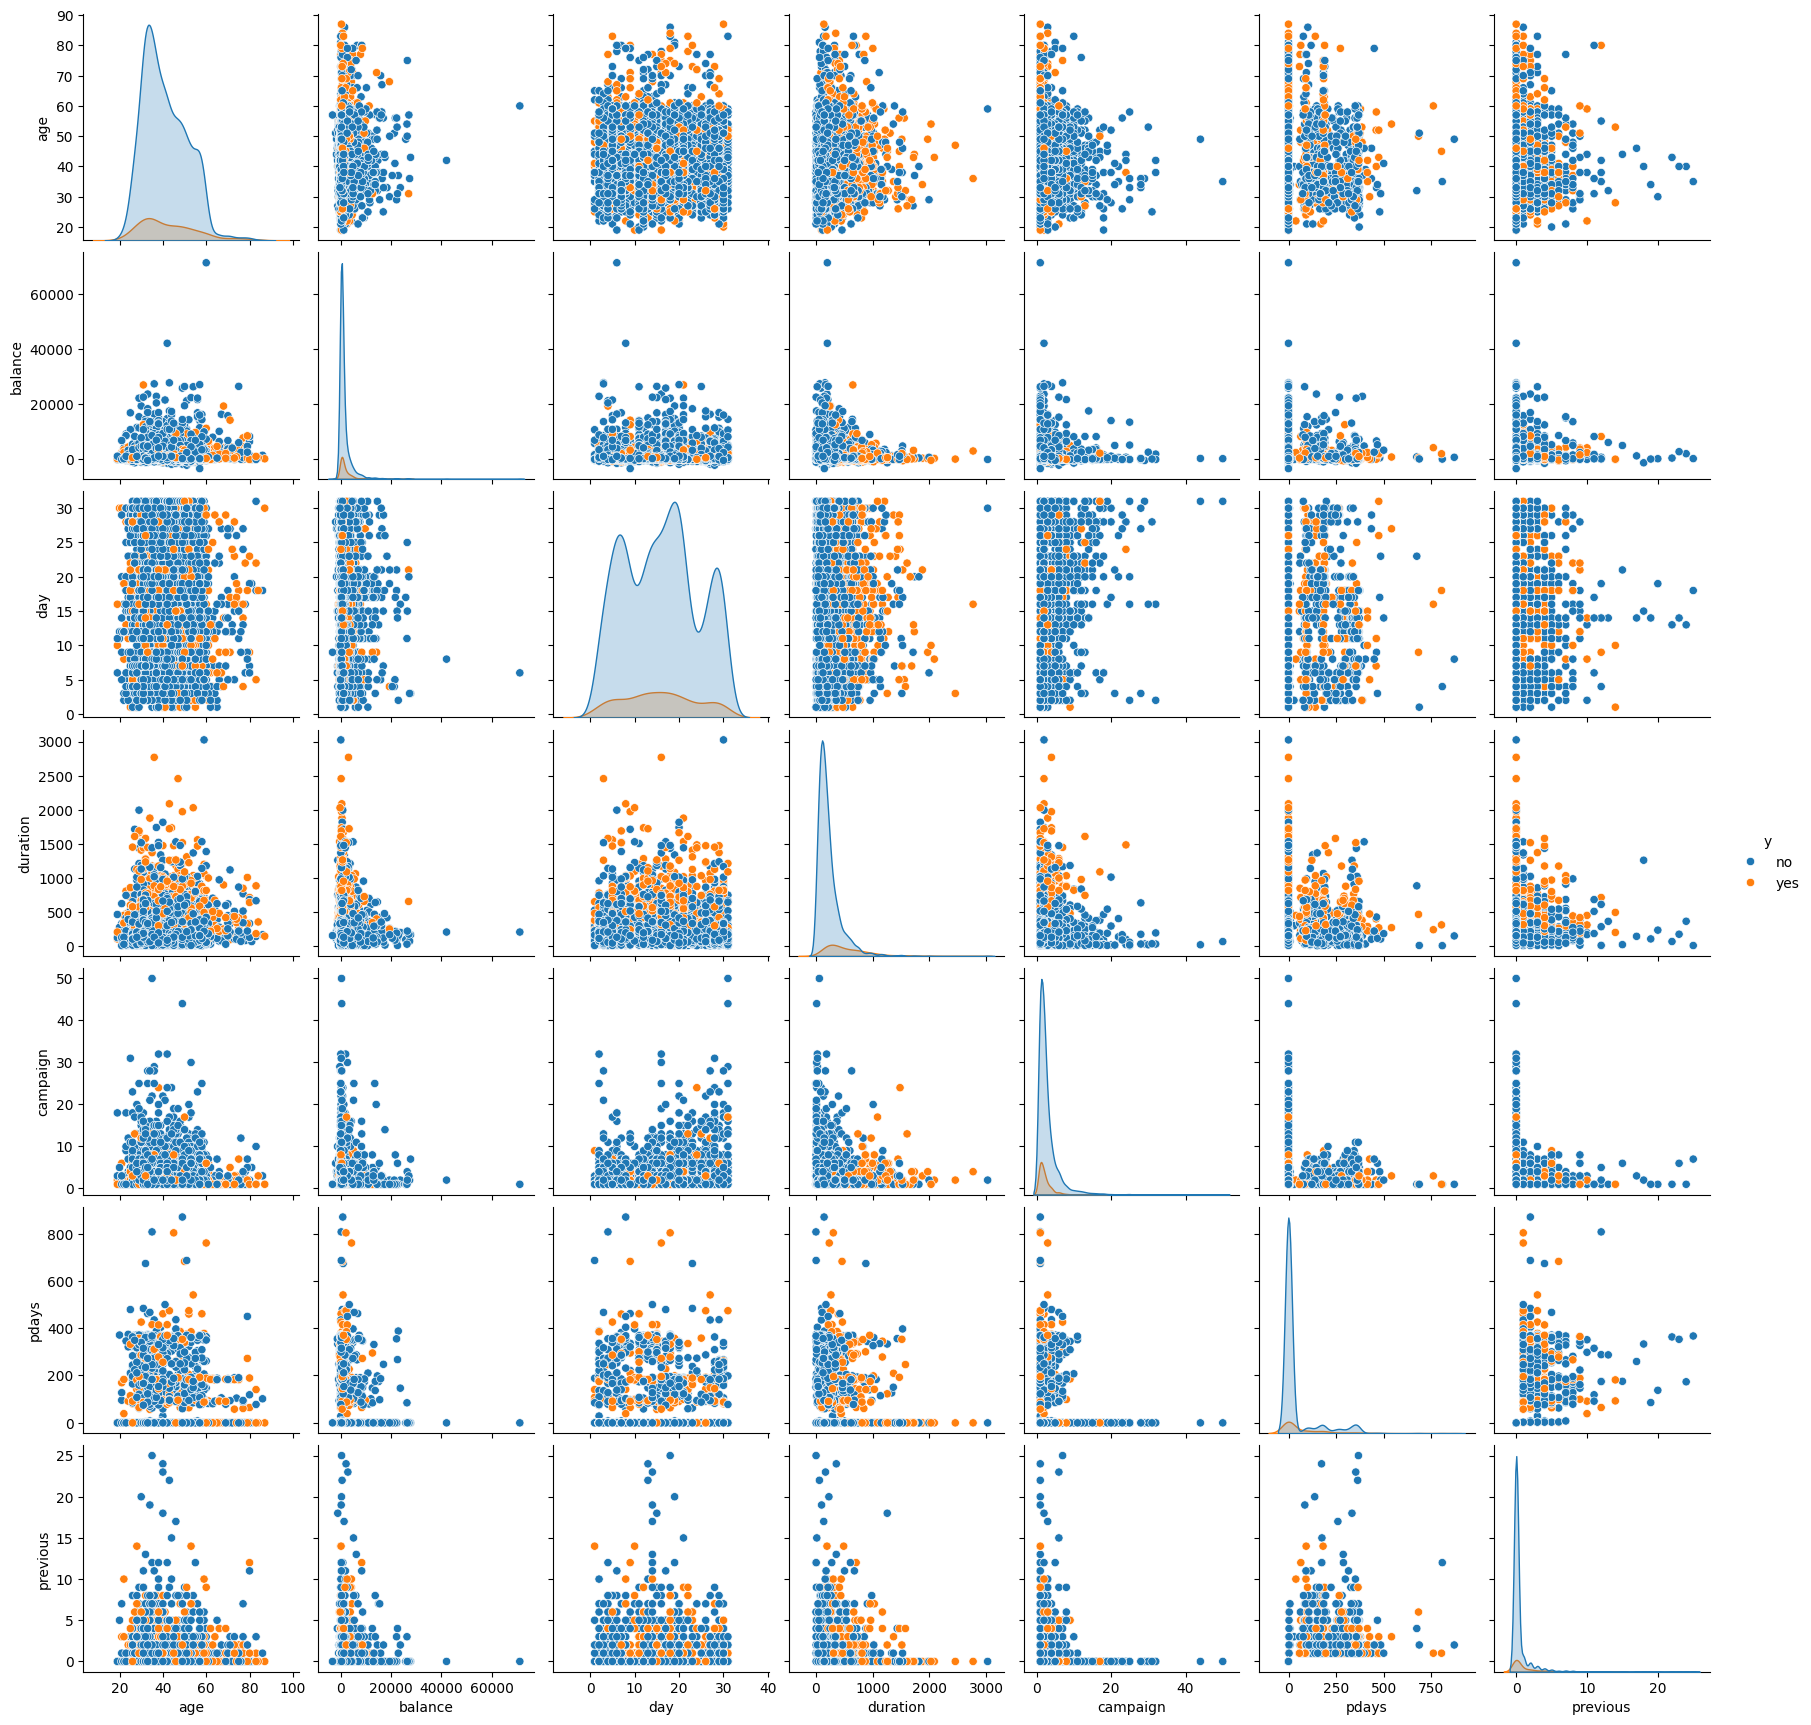

In [21]:
sns.pairplot(df, hue='y')

In [22]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df.sample(n = 5)

# Data encoding to change the categorical values into int.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3340,49,3,1,0,0,199,0,0,2,13,8,113,2,-1,0,3,0
2696,55,1,0,2,0,9756,1,0,0,5,6,103,2,95,1,1,1
3529,43,1,2,2,0,2731,0,0,0,21,9,11,7,-1,0,3,0
584,52,9,1,1,0,192,1,0,0,23,5,61,2,-1,0,3,0
3911,48,1,1,1,0,2294,1,0,2,26,8,251,11,-1,0,3,0


In [23]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df.sample(n = 5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2632,59,1,1,0,0,2358,1,0,0,17,0,30,1,-1,0,3,0
1824,37,0,2,1,0,781,0,0,0,20,1,75,1,-1,0,3,0
528,43,7,1,0,0,2567,1,0,0,14,8,109,1,360,2,0,0
1226,32,0,0,1,1,5,1,1,0,18,8,82,3,363,2,1,0
194,23,8,2,1,0,9216,0,0,0,5,6,471,2,-1,0,3,0


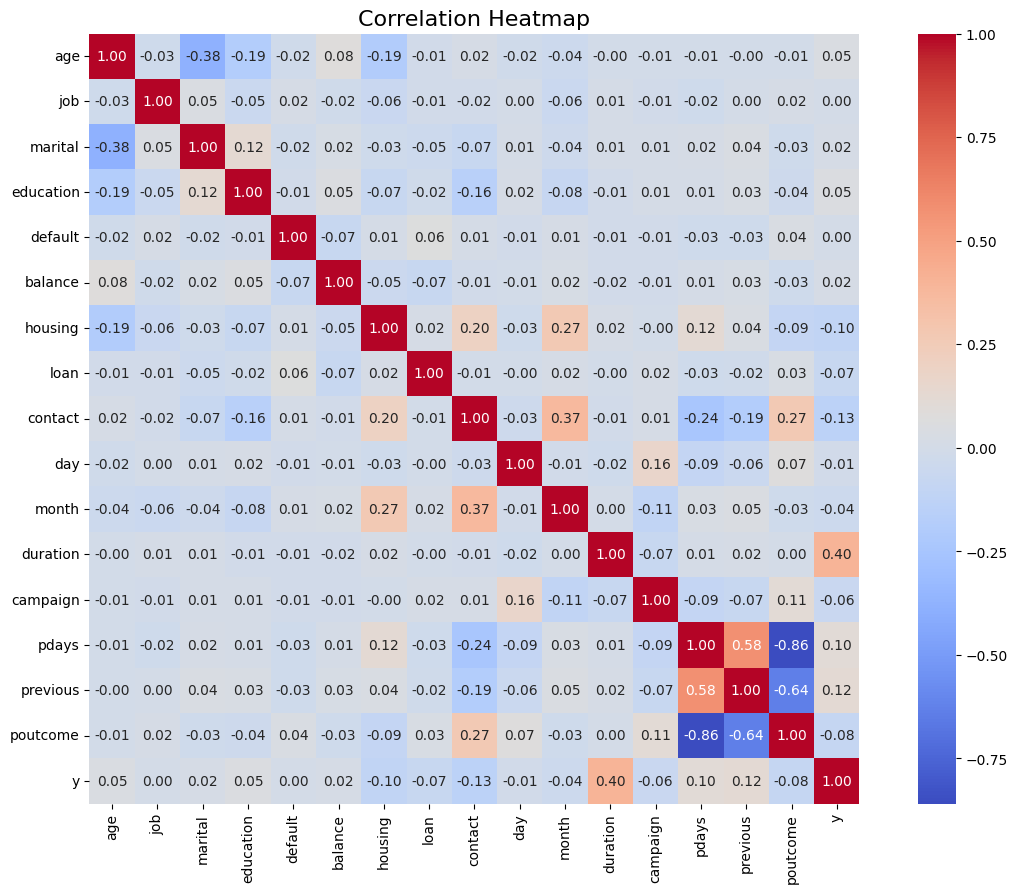

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Machine Learning (Split Data)

In [25]:
X = df.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'y'], axis = 1)
y = df['y']

In [26]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())

Class distribution after SMOTEEN:
y
0    2890
1    2172
Name: count, dtype: int64


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#80% train data 20% testing data

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')


Accuracy: 0.9901283316880553


In [30]:
y_train_rf = rf_classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

Testing accuracy: 0.9901
Training accuracy: 1.0000


In [31]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nConfusion Matrix Random Forest:")
print(cm_rf)


Confusion Matrix Random Forest:
[[590   8]
 [  2 413]]


In [32]:
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       598
           1       0.98      1.00      0.99       415

    accuracy                           0.99      1013
   macro avg       0.99      0.99      0.99      1013
weighted avg       0.99      0.99      0.99      1013



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [34]:
y_pred = gb_model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9782823297137216


In [36]:
cm_xg = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix XGBoost:")
print(cm_xg)

# Confusion matrix of XGBoost.


Confusion Matrix XGBoost:
[[582  16]
 [  6 409]]


In [37]:
class_report_xg = classification_report(y_test, y_pred)

print("Classification Report Random Forest: \n", class_report_xg)

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       598
           1       0.96      0.99      0.97       415

    accuracy                           0.98      1013
   macro avg       0.98      0.98      0.98      1013
weighted avg       0.98      0.98      0.98      1013

